In [1]:
import pertpy as pt
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random

Global seed set to 0


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [2]:
# read anndata
adata = pt.dt.mcfarland_2020()
# create metadata object
pt_metadata = pt.tl.CellLineMetaData()

In [3]:
# subset the anndata (memory issue)
adata = adata[:5000, :]

In [4]:
pt_metadata.annotate_cell_lines(adata)

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [5]:
pt_metadata.annotate_from_gdsc(adata)

Following 44 identifiers can not be found in the drug response data for GDSC1, their corresponding meta data are NA
values. Please check it again:
- Hs 766T
- CJM
- LNCaP clone FGC
- SW579
- MIA PaCa-2
- HCC-1195
- SNU-1041
- COLO 668
- DMS 273
- OAW42
- 786-O
- Hep 3B2.1-7
- NCI-H2126
- DV-90
- ACC-MESO-1
- MDA-MB-435S
- Panc 04.03
- Li-7
- JHH-5
- SW 480
- IGROV1
- GP2d
- 22Rv1
- SNU-1214
- SNU-1105
- LMSU
- A-375
- COV434
- Hs 852.T
- JHOM-1
- SW 900
- KNS-81
- NCI-H322
- TUHR4TKB
- KNS-60
- RH-30
- TEN
- SNU-685
- LUDLU-1
- PA-TU-8988S
- SNU-410
- HEC-1-B
- SNU-245
- Malme-3M

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [6]:
pt_metadata.annotate_bulk_rna_expression(adata)

There are 98 identifiers in `adata.obs`.

Following 18 identifiers can't be found in bulk RNA expression data. 

Resulting in NA values for their corresponding metadata. Please check again: 
- DMS 273
- IGROV1
- OAW42
- 786-O
- Hs 766T
- Hep 3B2.1-7
- 22Rv1
- RH-30
- A-375
- Panc 04.03
- Hs 852.T
- LNCaP clone FGC
- SW 900
- MIA PaCa-2
- NCI-H322
- HCC-1195
- SW 480
- COLO 668

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [7]:
# speed up runtime, convert pd.dataframe to nparray
adata.obsm['bulk_rna_expression_broad'] = adata.obsm['bulk_rna_expression_broad'].values

In [8]:
# subset to data where bulk rna expression and viability is not na
viability = adata.obs.IC50.values
not_na_viability = np.where(~np.isnan(viability))[0]
not_na_bulk = np.all(~np.isnan(adata.obsm['bulk_rna_expression_broad']), axis=1)
not_na_bulk= np.where(not_na_bulk)[0]
not_na_both = np.intersect1d(not_na_bulk, not_na_viability)
not_na_bulk_array = adata.obsm['bulk_rna_expression_broad'][not_na_both]
not_na_viability_array = viability[not_na_both]

In [9]:
data_train, data_test, label_train, label_test = train_test_split(not_na_bulk_array, 
                                                                  not_na_viability_array, test_size=0.20, random_state=42)
#data_test, data_val, label_test, label_val = train_test_split(data_test, label_test, test_size=0.5, random_state=42)

In [10]:
arc_witch = LinearRegression()
arc_witch.fit(data_train, label_train)

LinearRegression()

In [11]:
viability_predicted = arc_witch.predict(data_test)

Mean squared error: 0.00
Coefficient of determination: 1.00


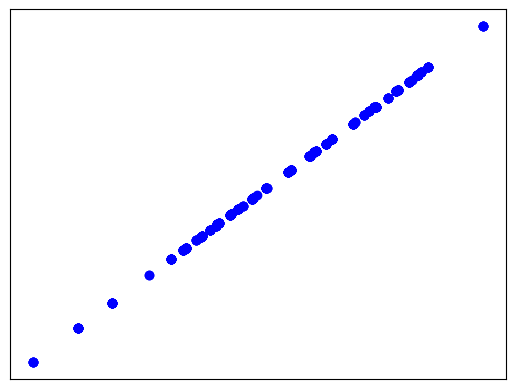

In [12]:
# The coefficients
# print("Coefficients: \n", arc_witch.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(label_test, viability_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(label_test, viability_predicted))

# Visualisation
plt.scatter(label_test, viability_predicted, color="blue")
plt.xticks(())
plt.yticks(())
plt.show()